In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [52]:
train_data = pd.read_csv('D:\HackerEarth-Will-your-employees-leave-you\Dataset\Train.csv')
submission_data = pd.read_csv('D:\HackerEarth-Will-your-employees-leave-you\Dataset\Test.csv')

In [53]:
print(train_data.shape)
print(submission_data.shape)

(7000, 24)
(3000, 23)


In [54]:
train_data.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [55]:
train_data.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,6588.000000,7000.000000,6856.000000,7000.000000,7000.000000,7000.000000,7000.000000,6991.000000,6989.000000,7000.000000,6423.000000,7000.000000,6344.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,39.622799,3.187857,13.385064,2.367143,47.064286,0.817857,2.798000,6.006294,2.387895,3.098571,-0.008126,-0.013606,1.891078,2.834143,7.101286,3.257000,0.189376
std,13.606920,1.065102,10.364188,1.149395,15.761406,0.648205,1.163721,2.058435,1.122786,0.836377,0.989850,0.986933,0.529403,0.938945,1.164262,0.925319,0.185753
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,27.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.070400
50%,37.000000,3.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650
75%,52.000000,4.000000,21.000000,3.000000,61.000000,1.000000,3.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


In [56]:
train_data.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [57]:
features_list = train_data.columns.to_list()
features_list

['Employee_ID',
 'Gender',
 'Age',
 'Education_Level',
 'Relationship_Status',
 'Hometown',
 'Unit',
 'Decision_skill_possess',
 'Time_of_service',
 'Time_since_promotion',
 'growth_rate',
 'Travel_Rate',
 'Post_Level',
 'Pay_Scale',
 'Compensation_and_Benefits',
 'Work_Life_balance',
 'VAR1',
 'VAR2',
 'VAR3',
 'VAR4',
 'VAR5',
 'VAR6',
 'VAR7',
 'Attrition_rate']

In [58]:
features_list.remove('Attrition_rate')
features_list.remove('Employee_ID')
features_list

['Gender',
 'Age',
 'Education_Level',
 'Relationship_Status',
 'Hometown',
 'Unit',
 'Decision_skill_possess',
 'Time_of_service',
 'Time_since_promotion',
 'growth_rate',
 'Travel_Rate',
 'Post_Level',
 'Pay_Scale',
 'Compensation_and_Benefits',
 'Work_Life_balance',
 'VAR1',
 'VAR2',
 'VAR3',
 'VAR4',
 'VAR5',
 'VAR6',
 'VAR7']

In [59]:
import plotly.express as px
grs = train_data.groupby(["Age"])[["Attrition_rate"]].mean().reset_index()
fig = px.bar(grs[['Age', 'Attrition_rate']].sort_values('Age', ascending=False), 
             y="Attrition_rate", x="Age", color='Age', 
             log_y=True, template='ggplot2')
fig.show()

In [60]:
for feature in features_list:
    grs = train_data.groupby([feature])[["Attrition_rate"]].mean().reset_index()
    fig = px.bar(grs[[feature, 'Attrition_rate']].sort_values(feature, ascending=False), 
             y="Attrition_rate", x=feature, color=feature, 
             log_y=True, template='ggplot2')
    fig.show()

In [61]:
train_data['Age'].fillna(52, inplace=True)
train_data['Time_of_service'].fillna(21, inplace=True) 
train_data['Pay_Scale'].fillna(8, inplace=True) 
train_data['Work_Life_balance'].fillna(3, inplace=True) 
train_data['VAR2'].fillna(0.751600, inplace=True)
train_data['VAR4'].fillna(2, inplace=True)

In [62]:
train_data.isnull().sum()

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
Attrition_rate               0
dtype: int64

In [63]:
submission_data['Age'].fillna(52, inplace=True)
submission_data['Time_of_service'].fillna(21, inplace=True) 
submission_data['Pay_Scale'].fillna(8, inplace=True) 
submission_data['Work_Life_balance'].fillna(3, inplace=True) 
submission_data['VAR2'].fillna(0.751600, inplace=True)
submission_data['VAR4'].fillna(2, inplace=True)

In [64]:
submission_data.isnull().sum()

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
dtype: int64

In [65]:
features_names = features_list
predict_class_name = ['Attrition_rate']

In [66]:
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.preprocessing import OneHotEncoder

In [67]:
X, y = train_data[features_names].values, train_data[predict_class_name].values

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [69]:
from sklearn.preprocessing import OrdinalEncoder

def prepare_inputs(X_train, X_test):
    ohe = OrdinalEncoder()
    ohe.fit(X_train)
    X_train_enc = ohe.transform(X_train)
    X_test_enc = ohe.transform(X_test)
    return X_train_enc, X_test_enc

In [70]:
X_train, X_test = prepare_inputs(X_train, X_test)

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [72]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

Intercept: 
 [0.21964008]
Coefficients: 
 [[ 8.83526299e-03 -1.14159547e-04 -8.61990363e-04  3.68419259e-03
   1.58625074e-03  1.77207891e-03  3.71121234e-03 -6.68962679e-05
   1.96678311e-03  1.99128159e-04 -4.18548053e-03  2.13615299e-03
  -1.92295473e-03 -7.73942483e-03  2.59098432e-03 -2.67789324e-03
  -3.34011163e-03 -4.48683848e-04 -9.49017241e-03 -2.01201926e-03
  -4.88098683e-04 -2.13063643e-03]]


In [74]:
output = model.predict(X_test)

In [75]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': output.flatten()})
df

,Actual,Predicted
0,0.1642,0.195988
1,0.0760,0.188662
2,0.2246,0.186041
3,0.3232,0.177716
4,0.1808,0.188169
...,...,...
1395,0.3332,0.192301
1396,0.0375,0.176077
1397,0.1613,0.207915
1398,0.1645,0.187741


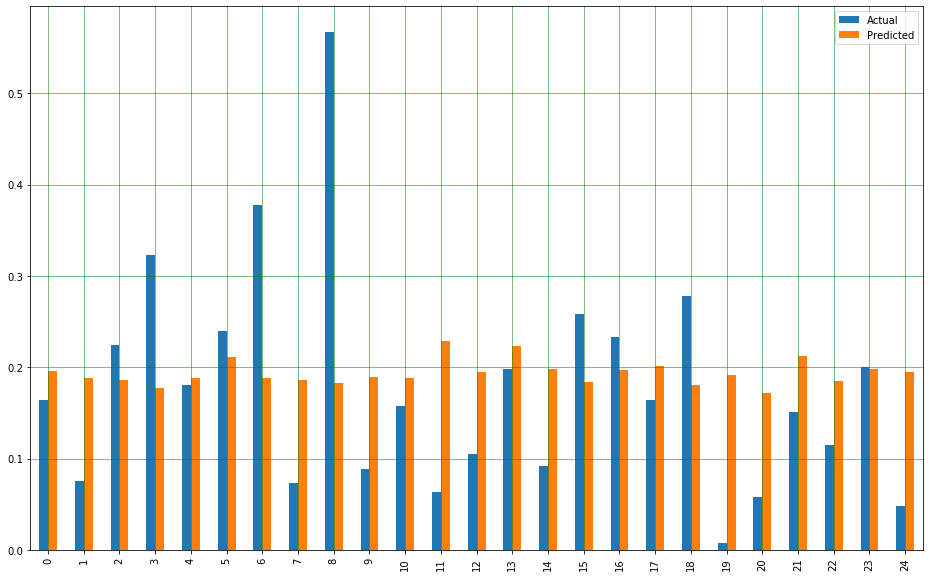

In [76]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [77]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, output))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, output))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, output)))

Mean Absolute Error: 0.12129136775603191
Mean Squared Error: 0.030321755967554907
Root Mean Squared Error: 0.1741314330256169


In [78]:
submission_data.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,...,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,EID_9658,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,...,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,EID_22203,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,...,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,EID_7652,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,...,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,EID_6516,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,...,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4


In [81]:
XX = submission_data[features_names].values

ohe = OrdinalEncoder()
ohe.fit(XX)
XX = ohe.transform(XX)

In [82]:
y_predict = model.predict(XX)

In [83]:
len(y_predict)

3000

In [84]:
y_predict

array([[0.21208404],
       [0.21745086],
       [0.19364569],
       ...,
       [0.17300981],
       [0.16049713],
       [0.19136031]])

In [85]:
import csv

with open('thirdv3_submission.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Employee_ID", "Attrition_rate"])
    
    for i in range(3000):
        writer.writerow([submission_data['Employee_ID'][i], y_predict[i][0]])

In [86]:
from sklearn.neighbors import KNeighborsRegressor

X, y = train_data[features_names].values, train_data[predict_class_name].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

X_train, X_test = prepare_inputs(X_train, X_test)

In [87]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [88]:
output = model.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': output.flatten()})
df

,Actual,Predicted
0,0.1642,0.26194
1,0.0760,0.18534
2,0.2246,0.22586
3,0.3232,0.15470
4,0.1808,0.31458
...,...,...
1395,0.3332,0.21308
1396,0.0375,0.15540
1397,0.1613,0.16898
1398,0.1645,0.13998


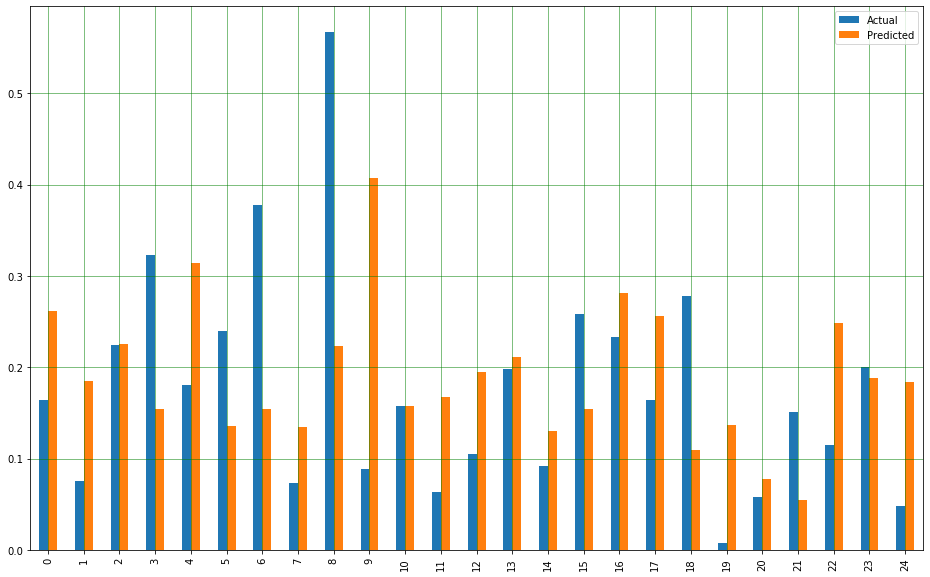

In [89]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [90]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, output))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, output))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, output)))

Mean Absolute Error: 0.1353408
Mean Squared Error: 0.036655903597714284
Root Mean Squared Error: 0.19145731534134255


In [91]:
y_predict = model.predict(XX)

import csv

with open('thirdv4_submission.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Employee_ID", "Attrition_rate"])
    
    for i in range(3000):
        writer.writerow([submission_data['Employee_ID'][i], y_predict[i][0]])

In [92]:
submission_data.describe()

,Age,Education_Level,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,40.452667,3.226333,13.535333,2.405333,46.878000,0.827333,2.794667,6.062667,2.382000,3.067000,0.079904,0.012328,1.916667,2.836333,7.130333,3.232333
std,13.419207,1.065904,10.149076,1.150426,16.051947,0.642643,1.188125,2.096713,1.142152,0.821017,0.981051,0.999734,0.517505,0.940837,1.152876,0.903305
min,19.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000
25%,28.000000,3.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000
50%,40.000000,3.000000,11.000000,2.000000,47.000000,1.000000,3.000000,6.000000,2.000000,3.000000,0.751600,-0.453700,2.000000,3.000000,7.000000,3.000000
75%,52.000000,4.000000,21.000000,3.000000,60.000000,1.000000,4.000000,8.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000
max,65.000000,5.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000


In [95]:
features_names

['Gender',
 'Age',
 'Education_Level',
 'Relationship_Status',
 'Hometown',
 'Unit',
 'Decision_skill_possess',
 'Time_of_service',
 'Time_since_promotion',
 'growth_rate',
 'Travel_Rate',
 'Post_Level',
 'Pay_Scale',
 'Compensation_and_Benefits',
 'Work_Life_balance',
 'VAR1',
 'VAR2',
 'VAR3',
 'VAR4',
 'VAR5',
 'VAR6',
 'VAR7']

In [96]:
new_features = ['Age', 'Compensation_and_Benefits', 'Work_Life_balance', 'Post_Level', 'growth_rate', 'Time_of_service', 'Pay_Scale', 'Hometown', 'Education_Level']


In [97]:
new_features

['Age',
 'Compensation_and_Benefits',
 'Work_Life_balance',
 'Post_Level',
 'growth_rate',
 'Time_of_service',
 'Pay_Scale',
 'Hometown',
 'Education_Level']

In [99]:
X, y = train_data[new_features].values, train_data[predict_class_name].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

X_train, X_test = prepare_inputs(X_train, X_test)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [100]:
output = model.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': output.flatten()})
df

,Actual,Predicted
0,0.1642,0.176026
1,0.0760,0.188350
2,0.2246,0.189556
3,0.3232,0.176016
4,0.1808,0.192105
...,...,...
1395,0.3332,0.201107
1396,0.0375,0.195420
1397,0.1613,0.186895
1398,0.1645,0.199594


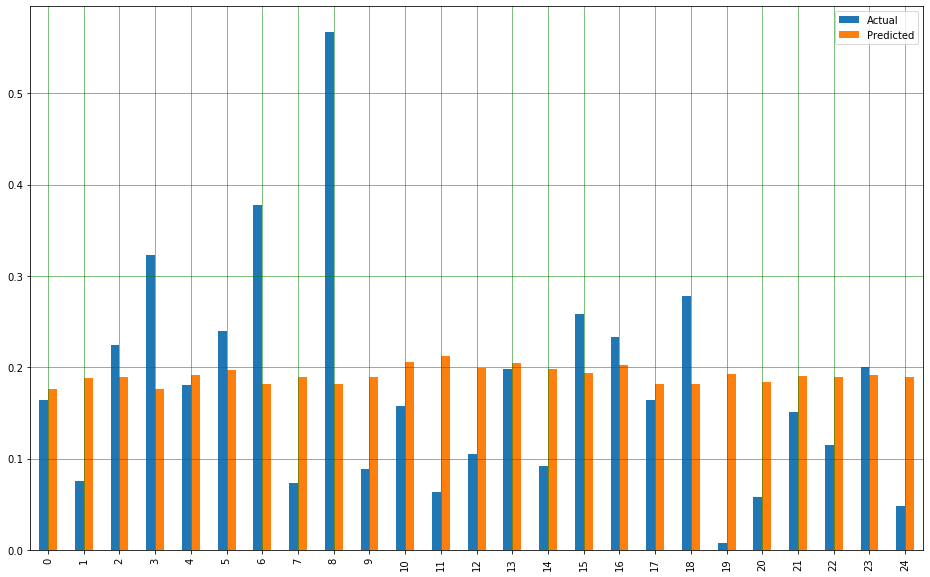

In [101]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [102]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, output))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, output))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, output)))

Mean Absolute Error: 0.12111537844227241
Mean Squared Error: 0.030281866424668746
Root Mean Squared Error: 0.1740168567256309


In [103]:
XX = submission_data[new_features].values

ohe = OrdinalEncoder()
ohe.fit(XX)
XX = ohe.transform(XX)

In [113]:
y_predict = model.predict(XX)

import csv

with open('Output/forth_submission.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Employee_ID", "Attrition_rate"])
    
    for i in range(3000):
        writer.writerow([submission_data['Employee_ID'][i], y_predict[i][0]])

IndexError: invalid index to scalar variable.